# Analiza skupień

Rozwiązanie: Zofia Hendrysiak

Do tej pory na ćwiczeniach zajmowaliśmy się technikami uczenia nadzorowanego, tzn. dane oznakowane były zarówno cechami $X$ jak i etykietami $y$. 

Na tych zajęciach przejdziemy do przejdziemy do uczenia nienadzorowanego, tzn. dane oznakowane będą wyłącznie cechami.

Zagadnieniem, którym będzie się zajmować będzie analiza skupień/grup (*clustering*).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

### K-średnich (K-means)

Proszę:
- wygenerować zbiór 1000 punktów przy użyciu funkcji `sklearn.datasets.make_blobs`,
- przeprowadzić operację skalowania przy użyciu klasy `StandardScaler`,
- narysować na płaszczyźnie wartości cech : oś OX - cecha 0, OY - cecha 1.


[[-6.59633932 -7.13901457]
 [-6.13753182 -6.58081701]
 [ 5.19820575  2.04917508]
 ...
 [ 3.69047995  4.60555175]
 [ 4.03036663  1.78619838]
 [-7.44179522 -7.08933147]]


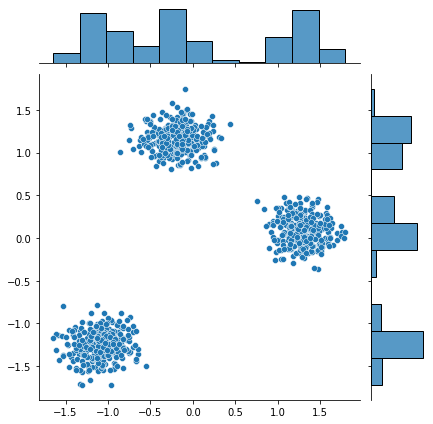

In [ ]:
X, _ = make_blobs(n_samples=1000,  centers=3, cluster_std=1, random_state=42)
print(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
sns.jointplot(data = X, x= X[:,0], y=X[:,1])

Proszę:
- na podstawie poprzedniego rysunku określić liczbę klastrów w danych.

In [ ]:
n_clusters = 3

Dane przygotowane, sprawdźmy jakie skupienia znajdzie algorytm k-średnich.

Proszę:
- utworzyć model `sklearn.cluster.KMeans` z parametrem `n_clusters` równym liczbie skupień w zbiorze danych,
- wyuczyć model na danych. Aby przewidzieć przynależność próbki danych do skupienia możesz użyć metody `predict`. Przynależności zbioru użytego do treningu dostępne są też w składowej modelu `labels_`.
- narysować zbiór danych z uwzględnieniem przynależności do znalezionych skupień.

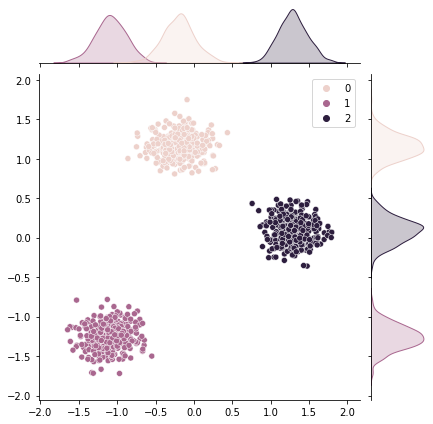

In [ ]:
model = KMeans(n_clusters=n_clusters)
model = model.fit(X)
y_predict = model.predict(X)
sns.jointplot(data = X, x= X[:,0], y=X[:,1], hue=y_predict);

Proszę:
- na jednym rysunku narysować zbiór danych, granicę decyzyjną modelu (funkcja `plot_decision`) oraz środki skupień (funkcja `plot_cluster_centers`),
- zwrócić uwagę na regularny (liniowy) kształt granicy decyzyjnej.

In [ ]:
def plot_decision(X, y, model, h = 0.02, ax=None, palette='tab10'):
  if ax is None:
    ax = plt.gca()
  if isinstance(X, pd.DataFrame):
    X = X.values
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax, palette=palette)
  ax.contour(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
  return ax

In [ ]:
def plot_cluster_centers(centers, ax=None):
  if ax is None:
    ax=plt.gca()
  ax.scatter(x=centers[:,0], y=centers[:,1], marker="o", c="white", alpha=1, s=200, edgecolor="k")
  for i, c in enumerate(centers):
      ax.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
  return ax

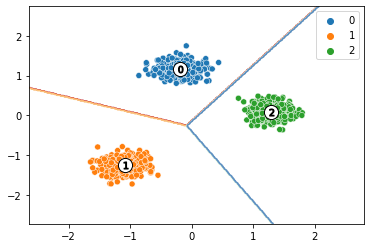

In [ ]:
ax = plot_decision(X, y_predict, model)
plot_cluster_centers(model.cluster_centers_);

#### Wybór liczby skupień

Kluczowym hiperparametrem algorytmu k-średnich jest liczba skupień.
W poprzednim przykładzie najpierw narysowaliśmy dane, żeby móc własnoręcznie określić liczę skupień. Takie rozwiązanie jest bardzo słabo skalowalne, a w przypadku danych o wielu cechach niemożliwe.

Zanim przejdziemy do znajdowania właściwej liczby klastrów zobaczmy, jak algorytm k-średnich będzie się zachowywał dla różnych wartości liczby klastrów.

Proszę:
- dla liczb klastrów w `[0,5]` narysować położenia centrów klastrów, granice decyzjne i dane.

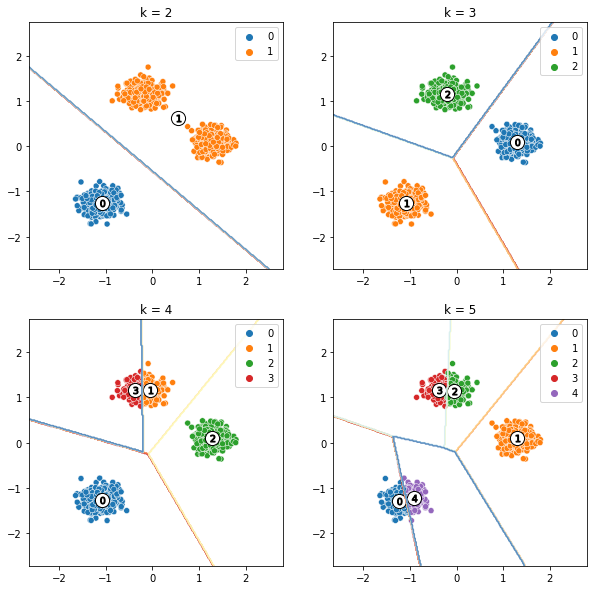

In [ ]:
k_range=range(2,6,1)
fig, axes= plt.subplots(2,2,figsize=(10,10))
for k, ax in zip(k_range, axes.reshape(-1)):
  model = KMeans(n_clusters=k)
  model = model.fit(X)
  y_predict = model.predict(X)
  plot_decision(X, y_predict, model, ax = ax)
  plot_cluster_centers(model.cluster_centers_, ax=ax)
  ax.set_title("k = {}".format(k))

Żeby móc porównywać modele konieczne jest wprowadzenie jakiejś metryki jakości. Tym razem nasze przykłady nie są oznaczane cechami, więc nie możemy stosować metryk znanych nam z uczenia nadzorowanego.

Dla modelu K-means możemy wprowadzić *bezwładność* (*inertia*) (średni kwadrat odległości między punktami, a najbliższymi centroidami). Spodziewamy się, że dla ustalonej liczby skupień modele z niższą *inercją* będą lepsze. Wraz ze wzrostem liczby skupień *inercja* również będzie maleć, dlatego porównywanie inercji nie jest wystarczające.

Proszę:
- narysować wykresj *inercji* modelu (`KMeans.inertia_`) od liczby klastrów dla liczb klastrów w przedziale $[2,5]$,
- zastanowić się, czemu na wykresie znajduje się punkt przegięcia (*elbow*).

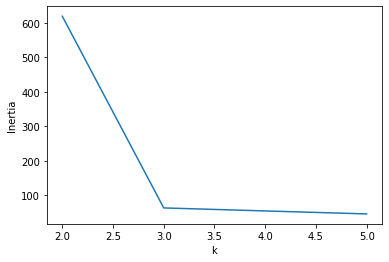

In [ ]:
k_range = range(2,6,1)
inertias = [KMeans(n_clusters=k).fit(X).inertia_ for k in k_range]
plt.plot(k_range, inertias)
plt.xlabel("k")
plt.ylabel("Inertia");

Inną metryką, którą możemy wprowadzić jest *wynik profilu* (*silhouette score*) będący średnią *współczynników profilu* (*silhouette coefficient*):

$$\frac{b-a}{\max(a,b)}$$, 
gdzie:
- $a$ jest średnią odległością do pozostałych przykładów w danym skupieniu (średnia odległość w skupieniu),
- $b$ jest średnią odległością danego przykładu do przykładów w najbliższym innym skupieniu (średnia odległość do najbliższego skupienia).

*Współczynnik profilu* przyjmuje wartości od `-1` do `1`, gdzie wartości bliskie `-1` wskazują, że przykład trafił do złego skupienia, a `1`, że trafił do dobrego.

*Wynik profilu* można bezpośrednio używać do porównywania modeli o różnej liczbie skupień, ale jest metryką kosztowną obliczeniową.

Proszę:
- narysować wykres *wyniku profilu*  modelu (`sklearn.metrics.silhouette_score`) od liczby klastrów dla liczby klastrów w przedziale $[2,5]$,
- znaleźć najlepszą liczbę klastrów.

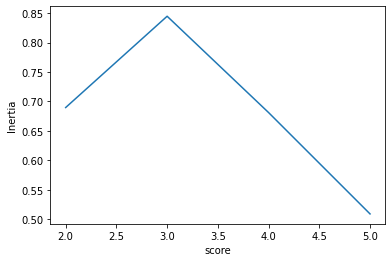

In [ ]:
scores = [silhouette_score(X,labels=KMeans(n_clusters=k).fit(X).predict(X)) for k in k_range]
plt.plot(k_range, scores)
plt.xlabel("score")
plt.ylabel("Inertia");

## Gaussowski model mieszany (Expectation maximization) (EM)

Proszę:
- korzystając z klasy `sklearn.cluster.GaussianMixture` przeprowadzić operację klastryzacji danych (te same dane co w algorytmie k-średnich)
- narysować na płaszczyńnie wartości cech, kolorująć dane wedgług znalezionych skupień.


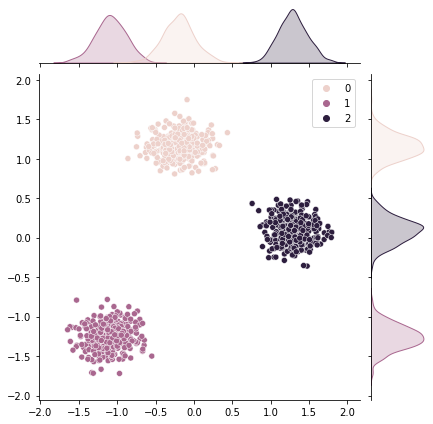

In [ ]:
model = GaussianMixture(n_components=n_clusters)
y_predict = model.fit(X).predict(X)
sns.jointplot(data = X, x=X[:,0], y=X[:,1], hue=y_predict)

Proszę narysować:
- dwuwymiarowy rozkład danych dla analizowanego zbioru, korzystając z funkcji `sns.jointplot`. Punkty powinny być pokolorowane według przynależności do skupień,
- korzystając z funkcji `plot_2d_gaussians` na tym samym wykresie nanieść rozkłady Gaussa dopasowane przez model.


Proszę:
- na jednym rysunku narysować dane z uwzględnieniem cech oraz wyczone przez model rozkłady skupień (funkcja `plot_2d_gaussian`).

In [ ]:
def plot_2d_gaussians(X, means, covs, ax=None, h=0.02):
    if ax is None:
      ax=plt.gca()
    if isinstance(X, pd.DataFrame):
      X = X.values
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    pos = np.dstack((xx, yy))
    for m, c in zip(means, covs):
      zz = multivariate_normal.pdf(pos, mean=m, cov=c)
      ax.contour(xx, yy, zz, levels=np.logspace(-5,1,7)) 

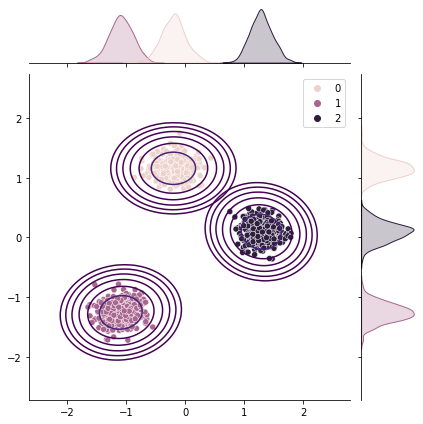

In [ ]:
graph = sns.jointplot(x=X[:,0], y=X[:,1], hue=y_predict)
plot_2d_gaussians(X, model.means_, model.covariances_, ax=graph.ax_joint);

## DBSCAN

Kolejnym popularnym algorytmem klasteryzacji jest DBSCAN.

Szkic algorytmu:
1. Dla każdego przykładu znajdź liczbę przykładów mieszczących się w odległości `eps` od niego (*$\epsilon$-sąsiedztwie*),
1. Jeżeli liczba ta jest większa niż `min_samples`, to jest to *przykład rdzeniowy*.
1. Wszystkie przykłady (*także inne przykłady rdzeniowe*) w *sąsiedztwie* *przykładu rdzeniowego* należą do tego samego klastra. 
1. Każdy przykład nie będący *przykładem rdzeniowym*, ani nie leżący w *sąsiedztwie* przykładu rdzeniowego jest anomalią.

Proszę:
- narysować skupienia znalezione za pomocą algorytmu `sklearn.cluster.DBSCAN` z parametrem `min_samples=5` i `eps` w `[.05, 0.1, 0.2]`. Na tych samych rysunkach zaznaczyć przykłady rdzeniowe: `DBSCAN.components_`

In [ ]:
X, _ = make_moons(n_samples=300, noise=0.05)

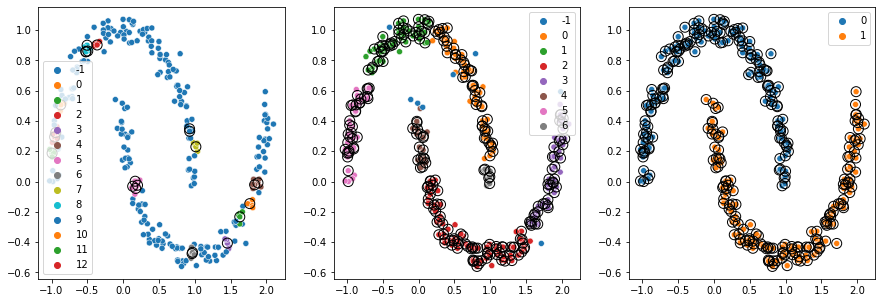

In [ ]:
eps=[.05,0.1,0.2]
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for eps, ax in zip(eps,axes.reshape(-1)):
  model = DBSCAN(eps, min_samples=5)
  model.fit(X)
  sns.scatterplot(x=X[:,0], y=X[:,1], hue=model.labels_, ax=ax, palette='tab10')
  core = model.components_
  ax.scatter(core[:,0], core[:,1],s=100, linewidth=1, facecolors='none', edgecolors='k');

## Porównanie algorytmów

W tej części zobaczymy, jak poznane algorytmy poradzą sobie na różnych zbiorach danych.



In [ ]:
n_samples = 1500

In [ ]:
circles, _ = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
moons, _  = make_moons(n_samples=n_samples, noise=0.05)
blobs, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.0, 0.5], random_state=170)
no_structure = np.random.rand(n_samples, 2)

aniso, _ = make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(aniso, transformation)

datasets=[(circles, {'n_class': 2, 'eps': 0.3}),
          (moons, {'n_class': 2, 'eps': 0.3} ),
          (blobs, {'n_class': 3, 'eps': 0.15}),
          (aniso, {'n_class': 3, 'eps': 0.15}),
          (no_structure, {'n_class': 3, 'eps': 0.3})
          ]
models=[(KMeans, 'n_class'), (GaussianMixture, 'n_class'), (DBSCAN, 'eps')]

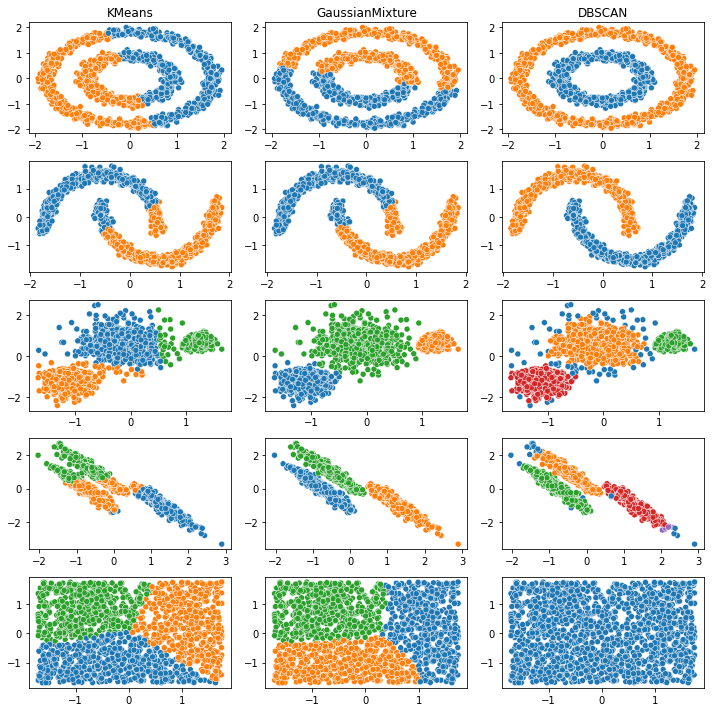

In [ ]:
fig, axes = plt.subplots(len(datasets), len(models), figsize=(10,10))
for ax, (model, _) in zip(axes[0], models):
  ax.set_title(model.__name__)
for axis, (X, parameter_values) in zip(axes, datasets):
  X = StandardScaler().fit_transform(X)
  for ax, (model_constructor, parameter) in zip (axis, models):
    model = model_constructor(parameter_values[parameter])
    y_pred = model.fit_predict(X)
    sns.scatterplot(x=X[:,0], y=X[:,1],hue=y_pred, ax=ax, legend=False, palette='tab10')
plt.tight_layout()

Proszę:
- na podstawie powyższych rysunków napisać, jakie warunki musi spełniać skupienie, aby dany algorytm prawidłowo je rozpoznał.

In [ ]:
### Twoje przemyślenia o algorytmach:
### BEGIN SOLUTION
#- Algorytm K-średnich ma problemy w przypadku skupień odbiegających kształtem od owalnego,
#- DBSCAN dobrze radzi sobie z różnymi kształtami skupień pod warunkiem, że mają stałą gęstość,
#- algorytm gaussowskiego modelu mieszanego dobrze radzi ze skupieniami, które można modelować wielowymiarowym rozkładem gaussowskim.
### END SOLUTION

## Segmentacja obrazu

Analiza skupień może zostać wykorzystana do segmentacji, np. grupowania klientów na podstawie historii zakupów lub wydzielania obszarów na zdjęciu ze względu na kolor lub obiekt do którego należą.

W naszym zadaniu zajmiemy się segmentacją kolorów na zdjęciu polegającej na grupowaniu pikseli na podstawie podobieństwa barw. Pomimo swojej prostoty segmentacja barw może być wykorzystana do bardzo naiwnej selekcji obiektów na zdjęciu, kompresji obrazu albo jako wstępny etap wykrywania konturów.

Proszę:
- pobrać i załadować zdjęcie,
- przekonwertować zdjęcie do skali szarości i na jego podstawie stworzyć tablicę `numpy.array`,
- wypisać na ekran kształt danych,
- zlinearyzować rysunek, czyli zmienić kształt danych na (-1,1).






In [ ]:
from PIL import Image

In [ ]:
!git clone https://github.com/akalinow/uczenie-maszynowe-2021-22

Cloning into 'uczenie-maszynowe-2021-22'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 104 (delta 49), reused 68 (delta 21), pack-reused 0
Receiving objects: 100% (104/104), 1.84 MiB | 4.49 MiB/s, done.
Resolving deltas: 100% (49/49), done.


image.shape: (256, 256)
X.shape: (65536, 1)


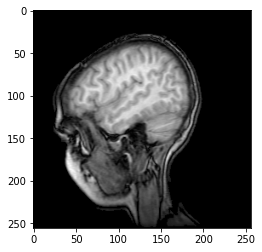

In [ ]:
img = Image.open('uczenie-maszynowe-2021-22/dane/image.png')
img = img.convert('L') # convertion from RGB to grayscale
image=np.asarray(img)
plt.imshow(image, cmap='gray')
print("image.shape:", image.shape)
X = image.reshape(-1,1)
print("X.shape:",X.shape)

Rysunek został wstępnie przetworzony. Do segmentacji danych użyjemy algorytm k-średnich, więc musimy znaleźć liczbę klastrów.

Proszę:
- narysować rozkłady bezwłasności oraz wyniku profilu przyjmując liczbę klastrów z zakresie $[2,8]$,
- znaleźć optymalną liczbę klastrów analizując uzyskane rozkłady.



In [ ]:
%time
def getScores(X, k):
    model = KMeans(n_clusters=k)
    model.fit(X).predict(X)
    silhouette = silhouette_score(X,labels=KMeans(n_clusters=k).fit(X).predict(X))
    inertia = KMeans(n_clusters=k).fit(X).inertia_
    return silhouette, inertia

k_range = np.arange(2,8,1)
scores = [ getScores(image,k) for k in k_range ]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


Best number of clusters is: 2


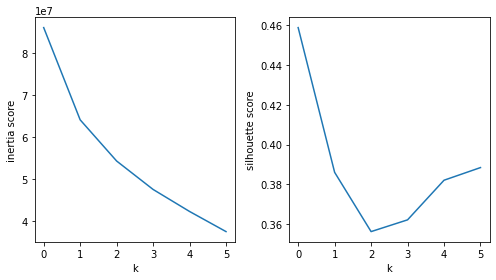

In [ ]:
scores = np.array(scores)

fig, axes = plt.subplots(1, 2, figsize=(7,4))
axes[0].plot(scores[:,1])
axes[0].set_xlabel("k")
axes[0].set_ylabel("inertia score")
axes[1].plot(scores[:,0])
axes[1].set_xlabel("k")
axes[1].set_ylabel("silhouette score")
best_k = k_range[np.argmax(scores[:,0])]
print("Best number of clusters is: {}".format(best_k))
fig.tight_layout()

Znając liczbę klastrów na rysunku utwórzmy fianlny model i użyjmy go do segmentacji.

Proszę:
- utworzyć model `KMeans` z optymalną liczbą klastrów,
- wyuczyć model na danych,
- narysować zdjęcie po segmentacji (wartości wszystkich pixeli należących do klastrów zastąpić wartością centroidu danego klastra),
- wypisać współrzędne centroidów. W jakiej przestrzeni są podane te współrzędne?

[[149.43924716]
 [  0.57345178]
 [ 45.08517195]
 [198.68226333]
 [ 91.34609133]]


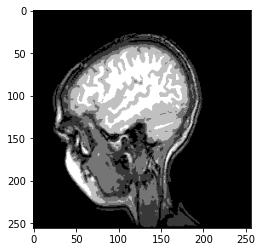

In [ ]:
X = image.reshape(-1,1)
model = KMeans(n_clusters=5)
model.fit(X)
segmented_image = model.cluster_centers_[model.labels_]
plt.imshow(segmented_image.reshape(image.shape), cmap='gray')
print(model.cluster_centers_)

Proszę:
- narysować histogram wartości poziomu szarości. Dla czytelności proszę nie rysować zliczeń dla czarnych pikseli,
- na tym samym rysunku proszę zaznaczyć położenia centroidów.



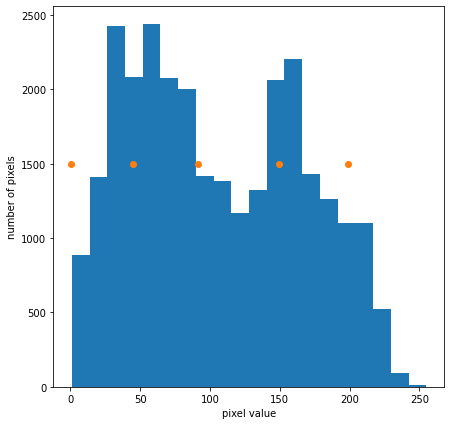

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

ax.hist(X[X>0], bins = 20)
centroids = model.cluster_centers_
ax.plot(centroids, np.full_like(centroids,1500), "o")
ax.set_xlabel("pixel value")
ax.set_ylabel("number of pixels");

Możemy też wyselekcjonować obszary na zdjęciu należące do wybranego skupienia. 

Proszę:
- narysować maskę składającą się wyłącznie z elementów zdjęcia należących do klastra `2`,
- narysować elementy zdjęcia dla których wartość piksela jesb bliska wartości (w odległości mniejszej niż 30) centroidu dla klastra `2`.

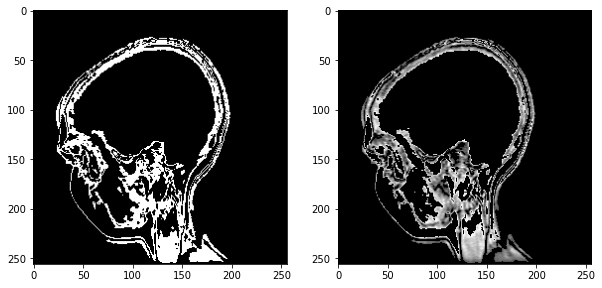

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(model.labels_.reshape(image.shape)==2, cmap='gray')
centroid0 = model.cluster_centers_[2]
X_filter = np.where(abs(centroid0-X)<30, X, 0)
ax[1].imshow(X_filter.reshape(image.shape), cmap='gray');

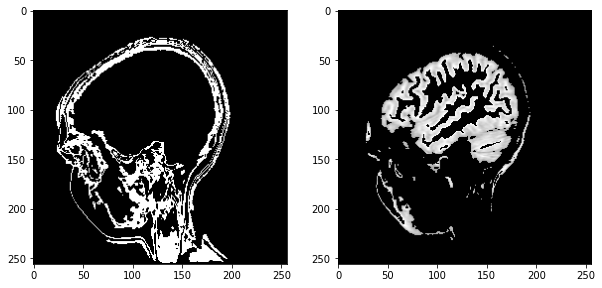

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(model.labels_.reshape(image.shape)==2, cmap='gray')
centroid0 = model.cluster_centers_[0]
X_filter = np.where(abs(centroid0-X)<30, X, 0)
ax[1].imshow(X_filter.reshape(image.shape), cmap='gray');

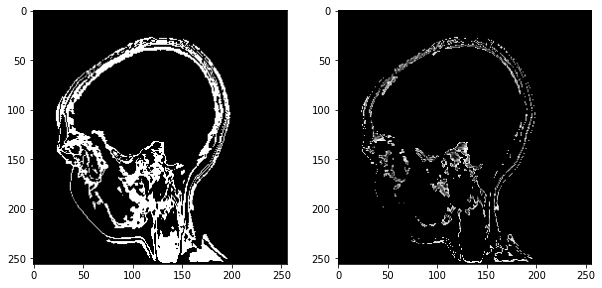

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(model.labels_.reshape(image.shape)==2, cmap='gray')
centroid0 = model.cluster_centers_[1]
X_filter = np.where(abs(centroid0-X)<30, X, 0)
ax[1].imshow(X_filter.reshape(image.shape), cmap='gray');

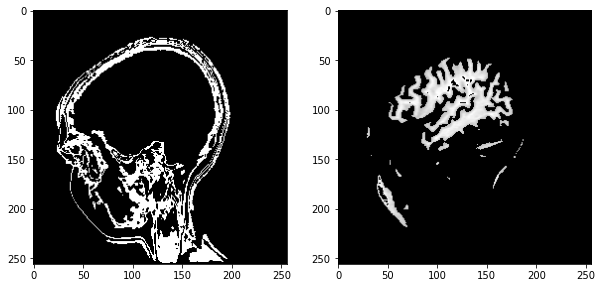

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(model.labels_.reshape(image.shape)==2, cmap='gray')
centroid0 = model.cluster_centers_[3]
X_filter = np.where(abs(centroid0-X)<30, X, 0)
ax[1].imshow(X_filter.reshape(image.shape), cmap='gray');